# Testing of IMF and E-1 Indices

Roadmap:

- Load in data -- DONE

- Merge data -- DONE

- See how IMF individually interacts with DLL -- take scalar, vector magnitude --> get guidance from Aaron

- See how various E-1 indices interact with DLL -- Kp, PCI, etc.

- Use findings from steps 3 and 4 to formulate a combination of these indices

In [1]:
# imports!
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime
from scipy.stats import iqr

In [2]:
# load in DLL data

f = open("DLL_zenodo_1995_T1h.txt", "r")

lines = [next(f) for _ in range(408134)]
remainder_of_file = f.read()  
f.close()

#making a nested list - possible implemmentation 
dataframe = []
for line in lines[21:]:
    data = line.split()
    dataframe.append(data)
    
df_1995 = pd.DataFrame(dataframe, columns = ["Date", "Day-of-year", "Time", "hourly avg location for the magnetopause B_barre", "hourly variance for the magnetopause", "lifetime for the autocorrelation function", "magnitude for radial diffusion"] )
df_1995

,Date,Day-of-year,Time,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion
0,1995/01/01,001,04:17,9.73e+00,3.60e-03,2.05e+00,-9.11e+00
1,1995/01/01,001,04:19,9.73e+00,3.24e-03,2.22e+00,-9.12e+00
2,1995/01/01,001,04:21,9.73e+00,3.29e-03,2.23e+00,-9.12e+00
3,1995/01/01,001,04:23,9.73e+00,3.20e-03,2.25e+00,-9.12e+00
4,1995/01/01,001,04:24,9.73e+00,3.12e-03,2.26e+00,-9.13e+00
...,...,...,...,...,...,...,...
408108,1995/12/31,365,23:54,1.00e+01,1.16e-02,3.63e+00,-8.48e+00
408109,1995/12/31,365,23:55,1.00e+01,1.20e-02,4.09e+00,-8.41e+00
408110,1995/12/31,365,23:56,1.00e+01,1.23e-02,4.31e+00,-8.38e+00
408111,1995/12/31,365,23:57,1.00e+01,1.26e-02,4.48e+00,-8.35e+00


### NASA Captions

FORMAT OF THE SUBSETTED FILE

    ITEMS                      FORMAT   

 0 YEAR                          I4        
 1 DOY                           I4        
 2 Hour                          I3        
 3 Scalar B, nT                  F6.1      
 4 Vector B Magnitude,nT         F6.1      
 5 Lat. Angle of B (GSE)         F6.1      
 6 Long. Angle of B (GSE)        F6.1      
 7 BX, nT (GSE, GSM)             F6.1      
 8 BY, nT (GSE)                  F6.1      
9 BZ, nT (GSE)                  F6.1      
10 BY, nT (GSM)                  F6.1      
11 BZ, nT (GSM)                  F6.1      
12 RMS_magnitude, nT             F6.1      
13 RMS_field_vector, nT          F6.1      
14 RMS_BX_GSE, nT                F6.1      
15 RMS_BY_GSE, nT                F6.1      
16 RMS_BZ_GSE, nT                F6.1      
17 SW Plasma Temperature, K      F9.0      
18 SW Proton Density, N/cm^3     F6.1      
19 SW Plasma Speed, km/s         F6.0      
20 SW Plasma flow long. angle    F6.1      
21 SW Plasma flow lat. angle     F6.1      
22 Alpha/Prot. ratio             F6.3      
23 sigma-T,K                     F9.0      
24 sigma-n, N/cm^3)              F6.1      
25 sigma-V, km/s                 F6.0      
26 sigma-phi V, degrees          F6.1      
27 sigma-theta V, degrees        F6.1      
28 sigma-ratio                   F6.3      
29 Flow pressure                 F6.2      
30 E elecrtric field             F7.2      
31 Plasma Beta                   F7.2      
32 Alfen mach number             F6.1      
33 Magnetosonic Much num.        F5.1      
34 Quasy-Invariant               F7.4      
35 Kp index                      I3        
36 R (Sunspot No.)               I4        
37 Dst-index, nT                 I6        
38 ap_index, nT                  I4        
39 f10.7_index                   F6.1      
40 AE-index, nT                  I5        
41 AL-index, nT                  I6        
42 AU-index, nT                  I6        
43 pc-index                      F6.1      
44 Lyman_alpha                   F9.6  

In [3]:
# load in NASA data
f = open("1995 NASA Data.lst", "r")

lines = [next(f) for _ in range(8760)]
remainder_of_file = f.read()  
f.close()

# captions
nasa_captions = ["YEAR", "DOY", "Hour", "Scalar B, nT", "Vector B Magnitude, nT", "Lat. Angle of B (GSE)", "Long. Angle of B (GSE)", "BX, nT (GSE, GSM)", "BY, nT (GSE)", "BZ, nT (GSE)", "BY, nT (GSM)", "BZ, nT (GSM)", "RMS_magnitude, nT", "RMS_field_vector, nT", "RMS_BX_GSE, nT", "RMS_BY_GSE, nT", "RMS_BZ_GSE, nT", "SW Plasma Temperature, K", "SW Proton Density, N/cm^3", "SW Plasma Speed, km/s", "SW Plasma flow long. angle", "SW Plasma flow lat. angle", "Alpha/Prot. ratio", "sigma-T,K", "sigma-n, N/cm^3)", "sigma-V, km/s", "sigma-phi V, degrees", "sigma-theta V, degrees", "sigma-ratio", "Flow pressure", "E elecrtric field", "Plasma Beta", "Alfen mach number", "Magnetosonic Much num.", "Quasy-Invariant", "Kp index", "R (Sunspot No.)", "Dst-index, nT", "ap_index, nT", "f10.7_index", "AE-index, nT", "AL-index, nT", "AU-index, nT", "pc-index", "Lyman_alpha"]

#making a nested list - possible implemmentation 
dataframe = []
for line in lines:
    data = line.split()
    dataframe.append(data)

nasa_data_1995 = pd.DataFrame(dataframe, columns =  nasa_captions)
nasa_data_1995

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1995,1,0,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,1995,1,1,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,1995,1,2,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,1995,1,3,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,1995,1,4,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1995,365,19,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,1995,365,20,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,1995,365,21,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399
8758,1995,365,22,5.6,3.7,22.7,181.2,-3.5,-0.1,1.4,...,10,0,-7,4,72.7,34,-5,28,-0.0,0.006399


We proceed to add the Composite E1 Index data.

In [4]:
# load in NASA data
f = open("Composite_Index.txt", "r")

lines = [next(f) for _ in range(15000)]
remainder_of_file = f.read()  
f.close()

# captions
e1_captions = ["SORT", "year", "day", "hr", "S(1)", "E(1)", "E(1) - E(1)pred", "Y(1)=log(1+absAL)", "Y(2)=log(1+absAU)", "Y(3)=PCI", "Y(4)=Kp", "Y(5)=am", "Y(6)=abs(Dst)", "Y(7)=log(0.01+Pemean)", "Y(8)=log(0.01+Pimean)", "Y(9)=log(0.01+Pips)", "Y(10)=log(Fe130)", "Y(11)=exp(-Ssince)", "Y(12)=abs(Tilt)", "Y(13)=log(vsw)", "Y(14)=log(nsw)", "Y(15)=sin2(theta/2)3", "Y(16)=-Bz", "Y(17)=log(Bmag)", "Y(18)=thetaBn3", "Y(19)=Rqint10"]

#making a nested list - possible implemmentation 
dataframe = []
for line in lines:
    data = line.split()
    dataframe.append(data)

composite_e1 = pd.DataFrame(dataframe, columns=e1_captions)
composite_e1

,SORT,year,day,hr,S(1),E(1),E(1) - E(1)pred,Y(1)=log(1+absAL),Y(2)=log(1+absAU),Y(3)=PCI,...,Y(10)=log(Fe130),Y(11)=exp(-Ssince),Y(12)=abs(Tilt),Y(13)=log(vsw),Y(14)=log(nsw),Y(15)=sin2(theta/2)3,Y(16)=-Bz,Y(17)=log(Bmag),Y(18)=thetaBn3,Y(19)=Rqint10
0,SORT,year,day,hr,S(1),E(1),E(1)-E(1)pred,Y(1)=log(1+absAL),Y(2)=log(1+absAU),Y(3)=PCI,...,Y(10)=log(Fe130),Y(11)=exp(-Ssince),Y(12)=abs(Tilt),Y(13)=log(vsw),Y(14)=log(nsw),Y(15)=sin2(theta/2)3,Y(16)=-Bz,Y(17)=log(Bmag),Y(18)=thetaBn3,Y(19)=Rqint10
1,1,1991,313,7,5.5253,3.9124,-1.1929,1.5066,0.73895,2.7696,...,0.19634,2.8507,1.1246,1.4016,1.4405,1.1410,3.8431,2.9587,1.5784,8.2399
2,2,1991,313,9,1.2934,3.5547,2.3596,1.5451,0.84717,2.3697,...,0.68632,-0.036731,0.59668,1.6957,-0.080383,-1.0270,-2.6414,2.6386,0.77641,1.0398
3,3,1991,313,10,2.8341,3.2938,0.67508,0.98190,1.3958,1.7699,...,0.75555,2.8507,0.28578,1.4016,2.1056,-0.063999,-0.58378,2.1613,1.2055,2.5024
4,4,1991,313,11,3.3710,3.5561,0.44131,2.2674,1.3553,3.2694,...,1.0563,0.73982,-0.028713,1.3634,1.5655,-0.36441,0.66324,2.4729,0.98990,4.4039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,1996,117,18,-0.55004,-0.72988,-0.22164,0.34816,-0.32932,-0.92915,...,-0.51932,-0.48867,0.88402,-0.76629,0.44161,-0.18118,-0.64613,0.24120,0.82508,-0.79240
14996,14996,1996,117,19,-0.86922,-0.87597,-0.072809,-1.7183,-0.88926,-1.3290,...,-0.74254,-0.48867,0.70296,-0.80348,0.35959,-0.57401,-1.2073,0.093723,0.39388,-0.77472
14997,14997,1996,117,20,-1.3599,-1.0709,0.18566,-2.1515,-0.88926,-1.1291,...,-0.93189,-0.48867,0.46112,-0.82845,-0.080383,-1.4462,-1.0514,-0.064111,-0.20368,-0.78042
14998,14998,1996,117,21,-1.2366,-1.5007,-0.35807,-1.4422,-0.64466,-0.82919,...,-0.88709,-0.48867,0.17494,-0.77865,-0.29527,-0.77350,0.10208,-0.61747,-1.0158,-0.69109


In [5]:
# clean only for necessary attributes
clean_composite_e1 = composite_e1[["year", "day", "hr", "E(1)"]]

clean_composite_e1_1995 = clean_composite_e1[clean_composite_e1["year"] == "1995"]

clean_composite_e1_1995["year"] = clean_composite_e1_1995["year"].astype(int)
clean_composite_e1_1995["day"] = clean_composite_e1_1995["day"].astype(int)
clean_composite_e1_1995["hr"] = clean_composite_e1_1995["hr"].astype(int)
clean_composite_e1_1995["E(1)"] = clean_composite_e1_1995["E(1)"].astype(float)

clean_composite_e1_1995

/tmp/ipykernel_627/3468051929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_composite_e1_1995["year"] = clean_composite_e1_1995["year"].astype(int)
/tmp/ipykernel_627/3468051929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_composite_e1_1995["day"] = clean_composite_e1_1995["day"].astype(int)
/tmp/ipykernel_627/3468051929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,year,day,hr,E(1)
4695,1995,1,9,-0.729050
4696,1995,1,10,-0.420290
4697,1995,1,11,-0.097706
4698,1995,1,12,-0.482400
4699,1995,1,14,-0.794660
...,...,...,...,...
12366,1995,364,19,-0.920410
12367,1995,364,20,-1.243300
12368,1995,364,21,-1.245700
12369,1995,364,22,-1.556000


As per Step 2 of the roadmap, we proceed to merge the data.

In [6]:
# helper functions
nasa_data_1995["DOY"] = nasa_data_1995["DOY"].astype(int)
nasa_data_1995["Hour"] = nasa_data_1995["Hour"].astype(int)

df_1995["Day-of-year"] = df_1995["Day-of-year"].astype(int)
df_1995["Hour"] = df_1995["Time"].str.split(":").str[0]
df_1995["Hour"] = df_1995["Hour"].astype(int)
df_1995["Hour"]


0          4
1          4
2          4
3          4
4          4
          ..
408108    23
408109    23
408110    23
408111    23
408112    23
Name: Hour, Length: 408113, dtype: int64

In [7]:
merged_df = pd.merge(df_1995, nasa_data_1995, how = 'inner', left_on = ["Day-of-year", "Hour"], right_on = ["DOY", "Hour"])
merged_df_e1 = pd.merge(merged_df, clean_composite_e1_1995, how = 'inner', left_on = ["DOY", "Hour"], right_on = ["day", "hr"])
merged_df_e1

,Date,Day-of-year,Time,hourly avg location for the magnetopause B_barre,hourly variance for the magnetopause,lifetime for the autocorrelation function,magnitude for radial diffusion,Hour,YEAR,DOY,...,f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha,year,day,hr,E(1)
0,1995/01/01,1,11:43,9.42e+00,3.51e-02,6.27e+00,-7.50e+00,11,1995,1,...,72.9,152,-119,32,0.7,0.006201,1995,1,11,-0.097706
1,1995/01/01,1,11:44,9.41e+00,3.44e-02,6.28e+00,-7.50e+00,11,1995,1,...,72.9,152,-119,32,0.7,0.006201,1995,1,11,-0.097706
2,1995/01/01,1,11:45,9.41e+00,3.36e-02,6.48e+00,-7.50e+00,11,1995,1,...,72.9,152,-119,32,0.7,0.006201,1995,1,11,-0.097706
3,1995/01/01,1,11:46,9.41e+00,3.28e-02,6.61e+00,-7.50e+00,11,1995,1,...,72.9,152,-119,32,0.7,0.006201,1995,1,11,-0.097706
4,1995/01/01,1,11:47,9.40e+00,3.21e-02,6.51e+00,-7.51e+00,11,1995,1,...,72.9,152,-119,32,0.7,0.006201,1995,1,11,-0.097706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367729,1995/12/30,364,23:55,9.43e+00,8.82e-03,2.06e+00,-8.58e+00,23,1995,364,...,72.8,21,-3,17,-0.0,0.006362,1995,364,23,-1.283800
367730,1995/12/30,364,23:56,9.43e+00,8.93e-03,2.06e+00,-8.58e+00,23,1995,364,...,72.8,21,-3,17,-0.0,0.006362,1995,364,23,-1.283800
367731,1995/12/30,364,23:57,9.43e+00,8.85e-03,2.09e+00,-8.58e+00,23,1995,364,...,72.8,21,-3,17,-0.0,0.006362,1995,364,23,-1.283800
367732,1995/12/30,364,23:58,9.44e+00,8.98e-03,2.00e+00,-8.59e+00,23,1995,364,...,72.8,21,-3,17,-0.0,0.006362,1995,364,23,-1.283800


## IMF Visualization and Analyses -- Strongest Correlations

With setup done, we proceed to work to understand the linear correlations between IMF and DLL. We will primarily be working with the following visualizations:

- "DLL vs. Scalar B, nT" -- Scatter plot for correlation, bivariate density plot for density of both values

- "DLL vs. E1-Composite Index" -- Scatter plot for general trends and correlation, bivariate density plot for density of either value

- "Scalar B, nT vs. E1-Composite Index" -- Scatter plot for general trends and correlation, bivariate density plot

After analysis of the general correlation of either of these, I seek to perform PCA (thanks Lillian!) to transform the data into a more usable context.

In [8]:
# clean 999.99 values of Scalar B, flow pressure, and Kp
merged_df_e1["magnitude for radial diffusion"] = merged_df_e1["magnitude for radial diffusion"].astype(float)
merged_df_e1["Scalar B, nT"] = merged_df_e1["Scalar B, nT"].astype(float)

merged_df_e1 = merged_df_e1[merged_df_e1["Scalar B, nT"] != 999.9]

In [9]:
# clean values of flow pressure
merged_df_e1["Flow pressure"] = merged_df_e1["Flow pressure"].astype(float)

merged_df_e1 = merged_df_e1[merged_df_e1["Flow pressure"] != 99.99]

In [10]:
merged_df_e1["Kp index"] = merged_df_e1["Kp index"].astype(float)

In [11]:
merged_df_e1["AE-index, nT"] = merged_df_e1["AE-index, nT"].astype(float)

merged_df_e1 = merged_df_e1[merged_df_e1["AE-index, nT"] != 99]

                                magnitude for radial diffusion  Scalar B, nT
magnitude for radial diffusion                        1.000000      0.522049
Scalar B, nT                                          0.522049      1.000000


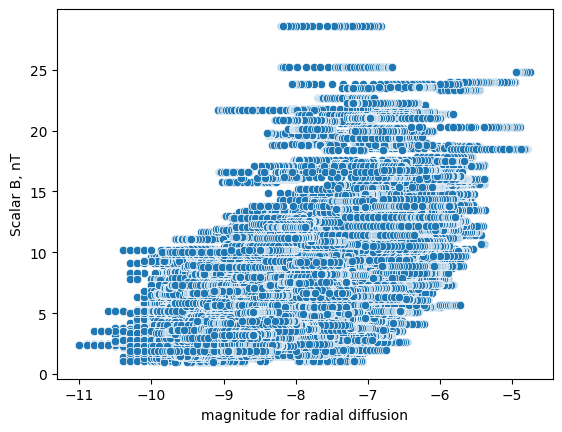

In [12]:
# DLL vs Scalar B, nT
# creating the scatter plot
sns.scatterplot(data=merged_df_e1, x="magnitude for radial diffusion", y="Scalar B, nT")
just_b_dll = merged_df_e1[["magnitude for radial diffusion", "Scalar B, nT"]]
print(just_b_dll.corr())

<AxesSubplot: xlabel='Scalar B, nT', ylabel='magnitude for radial diffusion'>

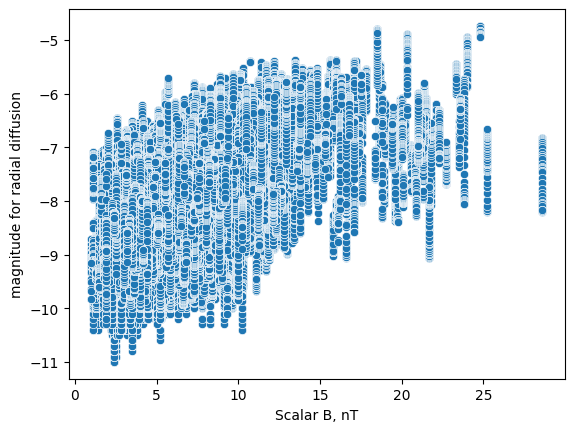

In [13]:
sns.scatterplot(data=merged_df_e1, x="Scalar B, nT", y="magnitude for radial diffusion")

In [14]:
# scatterplot tells me nothing of correlation
# sns.kdeplot(data=merged_df_e1, x="magnitude for radial diffusion", y="Scalar B, nT", fill=True)

We can interpret from this density plot that there is a somewhat strong linear correlation between certain values of Scalar B and magnitude for radial diffusion. From the scatter plot, we know that there is somewhat of a positive correlation between the two, despite not being too strong. From here, we seek to analyze the correlation between B and DLL.

                                magnitude for radial diffusion      E(1)
magnitude for radial diffusion                        1.000000  0.514645
E(1)                                                  0.514645  1.000000


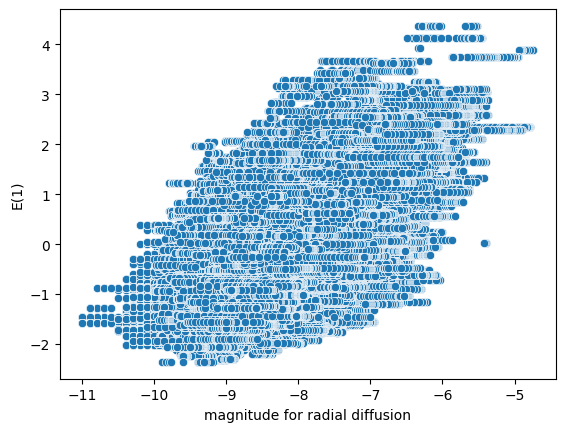

In [15]:
# DLL vs. E(1)
# scatter plot
# a blob for whatever reason, will group by median
sns.scatterplot(data=merged_df_e1, x="magnitude for radial diffusion", y="E(1)")
just_e1_dll = merged_df_e1[["magnitude for radial diffusion", "E(1)"]]
print(just_e1_dll.corr())

In [16]:
# sns.kdeplot(data=merged_df_e1, x="magnitude for radial diffusion", y="E(1)", fill=True)

              Scalar B, nT      E(1)
Scalar B, nT      1.000000  0.528675
E(1)              0.528675  1.000000


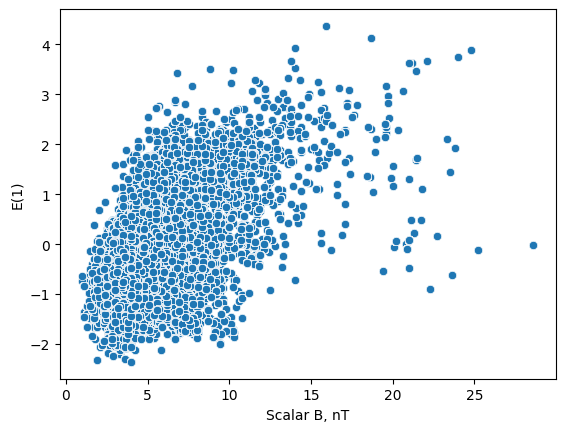

In [17]:
# Scalar B, nT vs. E(1)
sns.scatterplot(data=merged_df_e1, x="Scalar B, nT", y="E(1)")
just_b_e1 = merged_df_e1[["Scalar B, nT", "E(1)"]]
print(just_b_e1.corr())

In [18]:
# sns.kdeplot(data=merged_df_e1, x="Scalar B, nT", y="E(1)", fill=True)

In [19]:
# actually doing some modeling
# first modeling using linear regression on scalar B vs magnitude for radial diffusion
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neural_network import MLPRegressor

In [20]:
dll_array = []
scalar_b = []
composite = []
x = []

for i in merged_df_e1.index:
     x.append([merged_df_e1.loc[i, "Scalar B, nT"], merged_df_e1.loc[i, "E(1)"]])
     dll_array.append(merged_df_e1.loc[i, "magnitude for radial diffusion"])

x = np.array(x)
dll_array = np.array(dll_array)

In [21]:
dll_magnetic_model = LinearRegression().fit(x, dll_array)

In [22]:
r_sq = dll_magnetic_model.score(x, dll_array)
print(f"coefficient of determination: {r_sq}")

intercept = dll_magnetic_model.intercept_
print(f"intercept: {intercept}")

coefficients = dll_magnetic_model.coef_
print(f"coefficients: {coefficients}")

errors = dll_magnetic_model.predict(x) - dll_array

coefficient of determination: 0.3515829812289669
intercept: -8.830268464462533
coefficients: [0.09495605 0.24641403]


In [23]:
dll_magnetic_errors = dll_magnetic_model.predict(x) - dll_array

<AxesSubplot: xlabel='magnitude for radial diffusion', ylabel='Linear Regression, DLL vs. Scalar B Errors'>

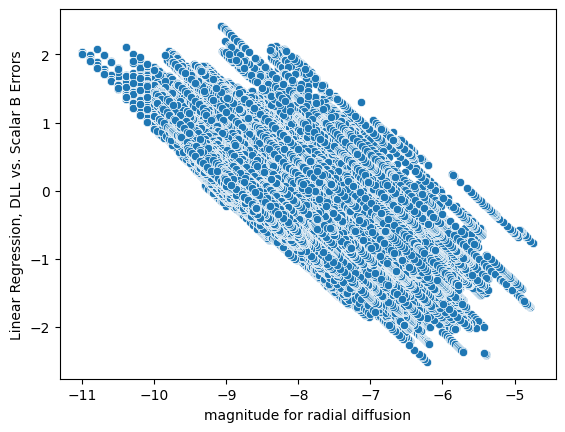

In [24]:
# tried a gradient descent, produced same results and took too long to load
# analyze the slope currently of the residuals
merged_df_e1["Linear Regression, DLL vs. Scalar B Errors"] = dll_magnetic_errors

sns.scatterplot(data=merged_df_e1, x="magnitude for radial diffusion", y="Linear Regression, DLL vs. Scalar B Errors")

In [34]:
# add more components, combining everything we've done?
dll_array = []
scalar_b = []
composite = []
x = []

for i in merged_df_e1.index:
     x.append([merged_df_e1.loc[i, "Scalar B, nT"], merged_df_e1.loc[i, "E(1)"], merged_df_e1.loc[i, "Flow pressure"], merged_df_e1.loc[i, "Kp index"]])
     dll_array.append(merged_df_e1.loc[i, "magnitude for radial diffusion"])

x = np.array(x)
dll_array = np.array(dll_array)

In [35]:
new_combined_model = LinearRegression().fit(x, dll_array)

Text(0, 0.5, 'Error')

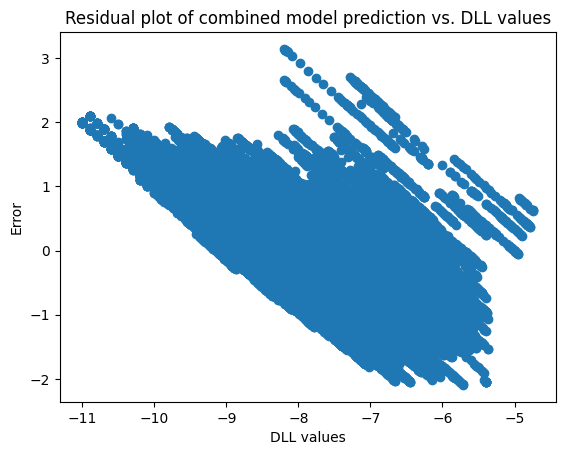

In [36]:
# residual plotting time oya bb
combined_errors = new_combined_model.predict(x) - dll_array

plt.scatter(dll_array, combined_errors) # more random? looks more like a blobby cloud
plt.title("Residual plot of combined model prediction vs. DLL values")
plt.xlabel("DLL values")
plt.ylabel("Error")
# test on 1996 data

In [38]:
# see if statsmodels.api produces the same thing
import statsmodels.api as sm

results = sm.OLS(dll_array, x).fit()
print(results.summary())
# correlation of 4.4494 for E(1)??? should not be happening, gonna just do IMF, Flow pressure, and Kp, and AE had strong correlation from visualization of data
# x1 is IMF
# x2 is E(1)
# x3 is Flow pressure
# x4 is Kp

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          1.702e+06
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        06:25:00   Log-Likelihood:                     -7.5122e+05
No. Observations:              366440   AIC:                                  1.502e+06
Df Residuals:                  366436   BIC:                                  1.502e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

AttributeError: 'OLSResults' object has no attribute 'mse'

In [29]:
# add more components, combining everything we've done?
dll_array = []
scalar_b = []
composite = []
x = []

for i in merged_df_e1.index:
     x.append([merged_df_e1.loc[i, "Scalar B, nT"], merged_df_e1.loc[i, "Flow pressure"], merged_df_e1.loc[i, "Kp index"], merged_df_e1.loc[i, "AE-index, nT"]])
     dll_array.append(merged_df_e1.loc[i, "magnitude for radial diffusion"])

x = np.array(x)
dll_array = np.array(dll_array)

In [30]:
no_e1_model = LinearRegression().fit(x, dll_array)

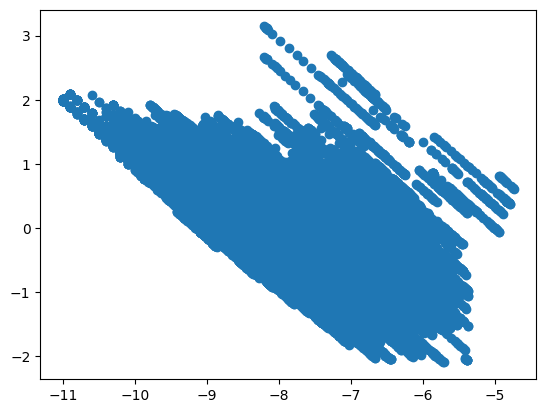

In [31]:
no_e1_errors = no_e1_model.predict(x) - dll_array
plt.scatter(dll_array, combined_errors) # no big difference

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>